In [37]:
import osmnx as ox
import networkx as nx
import geopandas as gpd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import pandas as pd
from shapely.geometry import Point
from shapely.geometry import LineString
from shapely.geometry import MultiLineString
from collections import deque
import datetime
from datetime import timedelta
from tqdm import tqdm

import warnings
warnings.filterwarnings('ignore')
%matplotlib inline

In [38]:
DATA_DIR = '../data'

In [53]:
df = pd.read_csv(f'{DATA_DIR}/stats_performance.csv')

In [118]:
def plot(X, Y, xlabel, ylabel):
    fig, ax = plt.subplots(figsize=(6, 4))
    m, b = np.polyfit(X, Y, 1)
    x = np.linspace(X.min(), X.max(), 10)
    ax.plot(x, m*x+b, 'k--', c='#999', zorder=1)
    ax.scatter(X, Y, c='#57068c', zorder=2)
    ax.set_xlabel(xlabel)
    ax.set_ylabel(ylabel)
    plt.show()

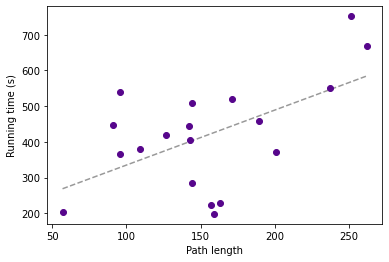

In [119]:
plot(df['path_length'], df['running_time'], 'Path length', 'Running time (s)')

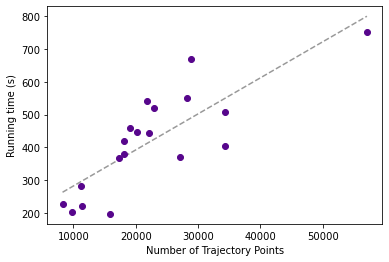

In [120]:
plot(df['point_count'], df['running_time'], 'Number of Trajectory Points', 'Running time (s)')

In [99]:
import statsmodels.formula.api as smf
lm = smf.ols(formula=f'running_time~path_length+point_count', data=df).fit()
display(lm.summary())


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           running_time   R-squared:                       0.674
Model:                            OLS   Adj. R-squared:                  0.633
Method:                 Least Squares   F-statistic:                     16.53
Date:                Sun, 22 Aug 2021   Prob (F-statistic):           0.000128
Time:                        00:17:23   Log-Likelihood:                -111.40
No. Observations:                  19   AIC:                             228.8
Df Residuals:                      16   BIC:                             231.6
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept     134.7307     65.645      2.052      0.057      -4.431     273.893
path_length     0.4135      0.477      0.867      0.399      -0.598       1.425
point_count     0.0098      0.002      4.223      0.001       0.005       0.015
==============================================================================
Omnibus:                        0.398   Durbin-Watson:                   2.286
Prob(Omnibus):                  0.820   Jarque-Bera (JB):                0.516
Skew:                          -0.056   Prob(JB):                        0.773
Kurtosis:                       2.201   Cond. No.                     7.71e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.71e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

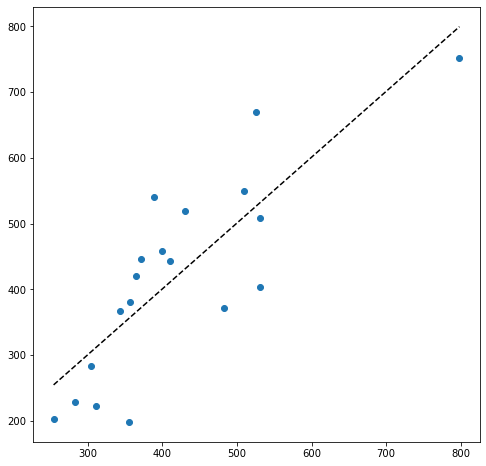

In [100]:
X = 0.4135* df['path_length'] + 0.0098*df['point_count'] + 134.7307
Y = df['running_time']
fig, ax = plt.subplots(figsize=(8, 8))
m, b = np.polyfit(X, Y, 1)
x = np.linspace(X.min(), X.max(), 10)
ax.plot(x, m*x+b, 'k--')
ax.scatter(X, Y)
plt.show()

In [122]:
df['point_count'].sum()

426401

In [125]:
df['running_time'].mean() / 60.0

6.986842105263158